In [1]:
import scipy.io
from decimal import Decimal
import matplotlib.pyplot as plt

### Reading MATLAB noise modeling results:

---- widefield/avg1 ----
PSNR = 25.11 dB
SSIM = 0.401
Noise modeling parameters = (3.43E-2, -1.04E-3) 

---- widefield/avg2 ----
PSNR = 28.12 dB
SSIM = 0.537
Noise modeling parameters = (1.67E-2, -4.75E-4) 

---- widefield/avg4 ----
PSNR = 31.08 dB
SSIM = 0.668
Noise modeling parameters = (8.43E-3, -2.31E-4) 

---- widefield/avg8 ----
PSNR = 34.00 dB
SSIM = 0.782
Noise modeling parameters = (4.25E-3, -1.14E-4) 

---- widefield/avg16 ----
PSNR = 36.91 dB
SSIM = 0.868
Noise modeling parameters = (2.13E-3, -5.60E-5) 



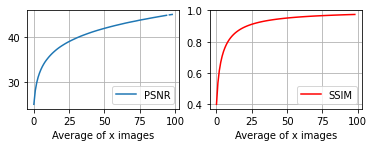

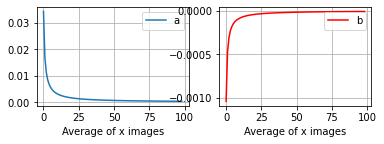

In [2]:
PSNR_list = []
SSIM_list = []
a_list = []
b_list = []

for avg in range(1,100):
    
    dataset = f'widefield/avg{avg}'

    PSNR = scipy.io.loadmat(dataset + '_PSNR.mat')['PSNR']
    SSIM = scipy.io.loadmat(dataset + '_SSIM.mat')['SSIM']
    NoiseAB = scipy.io.loadmat(dataset +'_NoiseAB.mat')['NoiseAB']

    PSNR_list.append(PSNR.mean())
    SSIM_list.append(SSIM.mean())
    a_list.append(NoiseAB.mean(0)[0])
    b_list.append(NoiseAB.mean(0)[1])
    
    if avg in [1,2,4,8,16]:
        print(f'---- {dataset} ----')
        print(f'PSNR = {PSNR.mean():.2f} dB')
        print(f'SSIM = {SSIM.mean():.3f}')
        print(f'Noise modeling parameters = ({Decimal(NoiseAB.mean(0)[0]):.2E}, {Decimal(NoiseAB.mean(0)[1]):.2E}) \n')
    
    
ax1=plt.subplot(2, 2, 1)
ax1.plot(PSNR_list, label='PSNR')
ax1.set_xlabel('Average of x images');
ax1.grid(); ax1.legend();

ax2=plt.subplot(2, 2, 2)
ax2.plot(SSIM_list, label='SSIM', color='r')
ax2.set_xlabel('Average of x images'); 
ax2.grid(); ax2.legend(); plt.show()


ax1=plt.subplot(2, 2, 1)
ax1.plot(a_list, label='a')
ax1.set_xlabel('Average of x images');
ax1.grid(); ax1.legend();

ax2=plt.subplot(2, 2, 2)
ax2.plot(b_list, label='b', color='r')
ax2.set_xlabel('Average of x images'); 
ax2.grid(); ax2.legend(); plt.show()


### The same for the SR datasets (without PSNR/SSIM)

---- City100/City100_iPhoneX ----


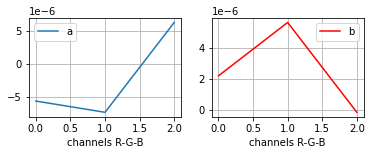

---- realSR/Canon/Test/2 ----


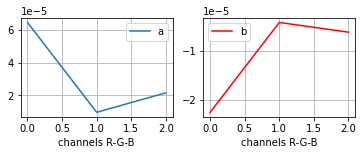

---- realSR/Nikon/Test/2 ----


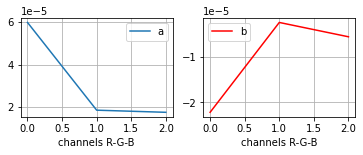

IndexError: list index out of range

In [3]:
dataset_names = []
dataset_names.append("City100/City100_NikonD5500")
dataset_names.append("City100/City100_iPhoneX")
dataset_names.append("realSR/Canon/Test/2")
dataset_names.append("realSR/Nikon/Test/2")

for dataset_idx in range(1,5):
    
    dataset = f'SR/dataset{dataset_idx}'
    NoiseAB = scipy.io.loadmat(dataset +'_NoiseAB.mat')['NoiseAB']

    a_list = []
    b_list = []
    for channel_idx in range(3): #noise estimated for each of the RGB channels
        a_list.append(NoiseAB.mean(0)[channel_idx][0])
        b_list.append(NoiseAB.mean(0)[channel_idx][1])

    print(f'---- {dataset_names[dataset_idx]} ----')
#     print(f'Noise modeling parameters = ({Decimal(NoiseAB.mean(0)[0]):.2E}, {Decimal(NoiseAB.mean(0)[1]):.2E}) \n')

    ax1=plt.subplot(2, 2, 1)
    ax1.plot(a_list, label='a')
    ax1.set_xlabel('channels R-G-B');
    ax1.grid(); ax1.legend();

    ax2=plt.subplot(2, 2, 2)
    ax2.plot(b_list, label='b', color='r')
    ax2.set_xlabel('channels R-G-B'); 
    ax2.grid(); ax2.legend(); plt.show()

In [ ]:
# plot noise bar figure
import numpy as np
import seaborn as sns
import pandas as pd

cameranoise1 = scipy.io.loadmat('SR/dataset1_NoiseAB.mat')['NoiseAB']
cameranoise2 = scipy.io.loadmat('SR/dataset2_NoiseAB.mat')['NoiseAB']
srnoise1 = scipy.io.loadmat('SR/dataset3_NoiseAB.mat')['NoiseAB']
srnoise2 = scipy.io.loadmat('SR/dataset4_NoiseAB.mat')['NoiseAB']
cameranoise = np.concatenate((cameranoise1, cameranoise2), axis=0)
cameranoise = np.mean(cameranoise,axis=0)
cameranoise = np.mean(cameranoise,axis=0)
srnoise = np.concatenate((srnoise1, srnoise2), axis=0)
srnoise = np.mean(srnoise,axis=0)
srnoise= np.mean(srnoise,axis=0)
ournoise_avg1 = scipy.io.loadmat('widefield/avg1_NoiseAB.mat')['NoiseAB']
ournoise_avg1 = np.mean(ournoise_avg1,axis=0)
ournoise_avg2 = scipy.io.loadmat('widefield/avg4_NoiseAB.mat')['NoiseAB']
ournoise_avg2 = np.mean(ournoise_avg2,axis=0)
ournoise_avg4 = scipy.io.loadmat('widefield/avg16_NoiseAB.mat')['NoiseAB']
ournoise_avg4 = np.mean(ournoise_avg4,axis=0)
ournoise_avg8 = scipy.io.loadmat('widefield/avg8_NoiseAB.mat')['NoiseAB']
ournoise_avg8 = np.mean(ournoise_avg8,axis=0)

sns.set_style("whitegrid")

dataset = pd.DataFrame({'dataset':['MIC360_1','MIC360_4','MIC360_16','FMD_1','realSR','City100'], 
                        'noise_a':[ournoise_avg1[0],ournoise_avg2[0],ournoise_avg4[0],0.02244,srnoise[0],cameranoise[0]]})
a=sns.barplot(x='dataset',y='noise_a',data=dataset,palette=['#40a368','#40a368','#40a368','#ff474c','#f97306','#bf77f6'])
a.set_xlabel('dataset', fontsize=12)
a.set_ylabel('noise parameter', fontsize=12)
a.set_yscale("log")
plt.savefig("noise.png", bbox_inches = "tight")